## Dependencies

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import tree

In [25]:
#assigming index id to movie_name and rearranging df so that it's the first column
movie = pd.read_csv('resources/Adjusted_Joined_v2.csv',encoding='latin-1')
movie['id'] = movie.index
movie = movie[['id'] + movie.columns[:-1].tolist()]
movie_final = movie.drop(['movie_name'], axis=1)
movie_final.head()

,id,Inflation_Success_Failure_Domestic,boxofficemojo_Success_Failure_Domestic,production_year,production_budget,production_budget_adjusted,domestic_box_office,inflation_domestic_adjusted,boxofficemojo_domestic_adjusted,international_box_office,...,vote_count,actor1_name,actor1_gender,actor2_name,actor2_gender,director_name,director_gender,producer_name,screeplay_name,editor_name
0,0,0,0,2006,32000000,32273517,1308696,1582213,1792214,5369337,...,83,George Clooney,2,Cate Blanchett,1,Steven Soderbergh,2,none,Paul Attanasio,Steven Soderbergh
1,1,0,0,2006,35000000,37120098,10144010,12264108,13891873,5317628,...,764,Hugh Jackman,2,Rachel Weisz,1,Darren Aronofsky,2,Arnon Milchan,Darren Aronofsky,Jay Rabinowitz
2,2,0,0,2006,13000000,15875021,13756082,16631103,18838482,54111916,...,510,Ken Watanabe,2,Kazunari Ninomiya,0,Clint Eastwood,2,Clint Eastwood,Paul Haggis,Joel Cox
3,3,0,0,2006,27500000,31159615,17510118,21169733,23979505,33068293,...,220,Judi Dench,1,Cate Blanchett,1,Richard Eyre,2,Robert Fox,Patrick Marber,John Bloom
4,4,1,1,2007,72500000,104914897,183135014,215549911,238767598,343936008,...,2043,Dan Castellaneta,2,Julie Kavner,1,David Silverman,2,James L. Brooks,Matt Groening,John Carnochan


In [26]:
movie_final.dropna(inplace=True)
movie_final.shape

#1403 movies and 31 Original Features

(1403, 31)

In [27]:
movie_final.head()

,id,Inflation_Success_Failure_Domestic,boxofficemojo_Success_Failure_Domestic,production_year,production_budget,production_budget_adjusted,domestic_box_office,inflation_domestic_adjusted,boxofficemojo_domestic_adjusted,international_box_office,...,vote_count,actor1_name,actor1_gender,actor2_name,actor2_gender,director_name,director_gender,producer_name,screeplay_name,editor_name
0,0,0,0,2006,32000000,32273517,1308696,1582213,1792214,5369337,...,83,George Clooney,2,Cate Blanchett,1,Steven Soderbergh,2,none,Paul Attanasio,Steven Soderbergh
1,1,0,0,2006,35000000,37120098,10144010,12264108,13891873,5317628,...,764,Hugh Jackman,2,Rachel Weisz,1,Darren Aronofsky,2,Arnon Milchan,Darren Aronofsky,Jay Rabinowitz
2,2,0,0,2006,13000000,15875021,13756082,16631103,18838482,54111916,...,510,Ken Watanabe,2,Kazunari Ninomiya,0,Clint Eastwood,2,Clint Eastwood,Paul Haggis,Joel Cox
3,3,0,0,2006,27500000,31159615,17510118,21169733,23979505,33068293,...,220,Judi Dench,1,Cate Blanchett,1,Richard Eyre,2,Robert Fox,Patrick Marber,John Bloom
4,4,1,1,2007,72500000,104914897,183135014,215549911,238767598,343936008,...,2043,Dan Castellaneta,2,Julie Kavner,1,David Silverman,2,James L. Brooks,Matt Groening,John Carnochan


In [28]:
#Get dummies
movie_final = pd.get_dummies(movie_final)
# movie_new = movie_final.drop(['inflation_domestic_adjusted', 'boxofficemojo_domestic_adjusted'])

In [33]:
# #created dataframe with correlations for all columns 
name = []
correlation = []
for movie in movie_final:
    name.append(movie)
    correlation.append(movie_final['Inflation_Success_Failure_Domestic'].corr(movie_final[movie]))
correlation_df = pd.DataFrame({'name': name, 'correlation': correlation})[['name','correlation']]
positive_df = correlation_df.sort_values(by=['correlation'], ascending=False)
positive_df.head(50)

,name,correlation
1,Inflation_Success_Failure_Domestic,1.000000
2,boxofficemojo_Success_Failure_Domestic,0.928651
6,domestic_box_office,0.305937
7,inflation_domestic_adjusted,0.299836
8,boxofficemojo_domestic_adjusted,0.297095
514,production_countries_United States of America,0.138449
0,id,0.137704
3,production_year,0.132441
3693,producer_name_William Packer,0.131319
4708,editor_name_Michael L. Sale,0.131319


In [34]:
# #making a list based off the top correlated columns to feed into regression
top = positive_df['name'].values.tolist()[:50]
top.remove('inflation_domestic_adjusted')
top.remove('boxofficemojo_domestic_adjusted')
top.remove('id')
# top.remove('production_budget')
top.remove('Inflation_Success_Failure_Domestic')
top.remove('boxofficemojo_Success_Failure_Domestic')
top.remove('domestic_box_office')
top.remove('international_box_office')
# top.remove('id')

#setting feature list to x_names
x_names = top

In [35]:
print("all", len(x_names), "dummy features listed")
x_names

all 43 dummy features listed


['production_countries_United States of America',
 'production_year',
 'producer_name_William Packer',
 'editor_name_Michael L. Sale',
 'vote_count',
 'producer_name_Christopher Meledandri',
 'actor1_name_Tobin Bell',
 'actor1_name_Sandra Bullock',
 'vote_average',
 'source_Based on Factual Book/Article',
 'actor2_name_Robert Pattinson',
 'actor2_name_Kristen Wiig',
 'producer_name_Ice Cube',
 'actor2_name_Melissa McCarthy',
 'screeplay_name_Melissa Rosenberg',
 'screeplay_name_Scott Neustadter',
 'actor2_name_Kevin Hart',
 'actor2_name_Costas Mandylor',
 'director_name_Tim Story',
 'editor_name_Mark Livolsi',
 'popularity',
 'actor1_name_Bradley Cooper',
 'genre_Horror',
 'screeplay_name_Drew Goddard',
 'director_name_Rawson Marshall Thurber',
 'director_name_Pierre Coffin',
 'director_name_Theodore Melfi',
 'actor2_name_Vera Farmiga',
 'producer_name_Roy Lee',
 'director_name_Jon Lucas',
 'director_name_Anne Fletcher',
 'editor_name_Gregory Perler',
 'screeplay_name_Ken Daurio',
 'sc

In [36]:
#Setting variables
X = movie_final[x_names]

y = movie_final["Inflation_Success_Failure_Domestic"]
# y = movie_final["boxofficemojo_Success_Failure_Domestic"]

In [37]:
#Splitting test/train set of a random state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Logistic Regression

In [38]:
#instanciating model
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
#fitting our dataset
logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
print(f"Training Data Score: {logis.score(X_train, y_train)}")
print(f"Testing Data Score: {logis.score(X_test, y_test)}")

Training Data Score: 0.8460076045627376
Testing Data Score: 0.8347578347578347


In [43]:
logis = LogisticRegression(class_weight="balanced", random_state=42)
logis.fit(X_train, y_train)

print ("\n\n ---Logistic Regression Model---")
print ("")
logic_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % logic_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))



 ---Logistic Regression Model---

Logistic Regression AUC = 0.64
             precision    recall  f1-score   support

          0       0.88      0.82      0.85       291
          1       0.35      0.47      0.40        60

avg / total       0.79      0.76      0.77       351



## Random Forest Classifier

In [44]:
#Instanciating
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [45]:
#Training the rf model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [51]:
#total test/train data set
print(len(rf.predict(X_test)))

351


In [52]:
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.9809885931558935
Testing Data Score: 0.8376068376068376


In [53]:
%%timeit
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=30,
    class_weight="balanced",
    max_features='auto',
    random_state=42
  )

rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
print ("")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      0.43      0.45        60

avg / total       0.81      0.82      0.82       351



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      0.43      0.45        60

avg / total       0.81      0.82      0.82       351



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      0.43      0.45        60

avg / total       0.81      0.82      0.82       351



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      0.43      0.45        60

avg / total       0.81      0.82      0.82       351



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      0.43      0.45        60

avg / total       0.81      0.82      0.82       351



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      0.43      0.45        60

avg / total       0.81      0.82      0.82       351



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      0.43      0.45        60

avg / total       0.81      0.82      0.82       351



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      0.43      0.45        60

avg / total       0.81      0.82      0.82       351



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      0.43      0.45        60

avg / total       0.81      0.82      0.82       351



 ---Random Forest Model---

Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.88      0.90      0.89       291
          1       0.46      

In [54]:
rf.feature_importances_
print(len(rf.feature_importances_))

43


In [55]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

# Flipping indices to top 200 features
indices = np.argsort(importances)[:-41:-1]

# Printing the features ranking: top 40
print("Feature ranking:")
for f in range(40):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], x_names[indices[f]], importances[indices[f]]))  

Feature ranking:
1. feature 20: popularity (0.240054)
2. feature 4: vote_count (0.232370)
3. feature 8: vote_average (0.160314)
4. feature 1: production_year (0.112378)
5. feature 0: production_countries_United States of America (0.030334)
6. feature 22: genre_Horror (0.016537)
7. feature 3: editor_name_Michael L. Sale (0.016080)
8. feature 39: production_companies_Front Street Productions (0.012274)
9. feature 6: actor1_name_Tobin Bell (0.012182)
10. feature 9: source_Based on Factual Book/Article (0.011297)
11. feature 30: director_name_Anne Fletcher (0.010943)
12. feature 7: actor1_name_Sandra Bullock (0.009998)
13. feature 5: producer_name_Christopher Meledandri (0.009974)
14. feature 2: producer_name_William Packer (0.009890)
15. feature 21: actor1_name_Bradley Cooper (0.009206)
16. feature 15: screeplay_name_Scott Neustadter (0.008986)
17. feature 19: editor_name_Mark Livolsi (0.007456)
18. feature 41: director_name_John Erick Dowdle (0.007204)
19. feature 18: director_name_Tim S

In [56]:
# #sample plot
# feature_importances = pd.Series(importances[indices], index=X.columns[indices])
# feature_importances.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
# feature_importances.plot(kind="bar", figsize=(50,5), fontsize=14)

## Feature Importances

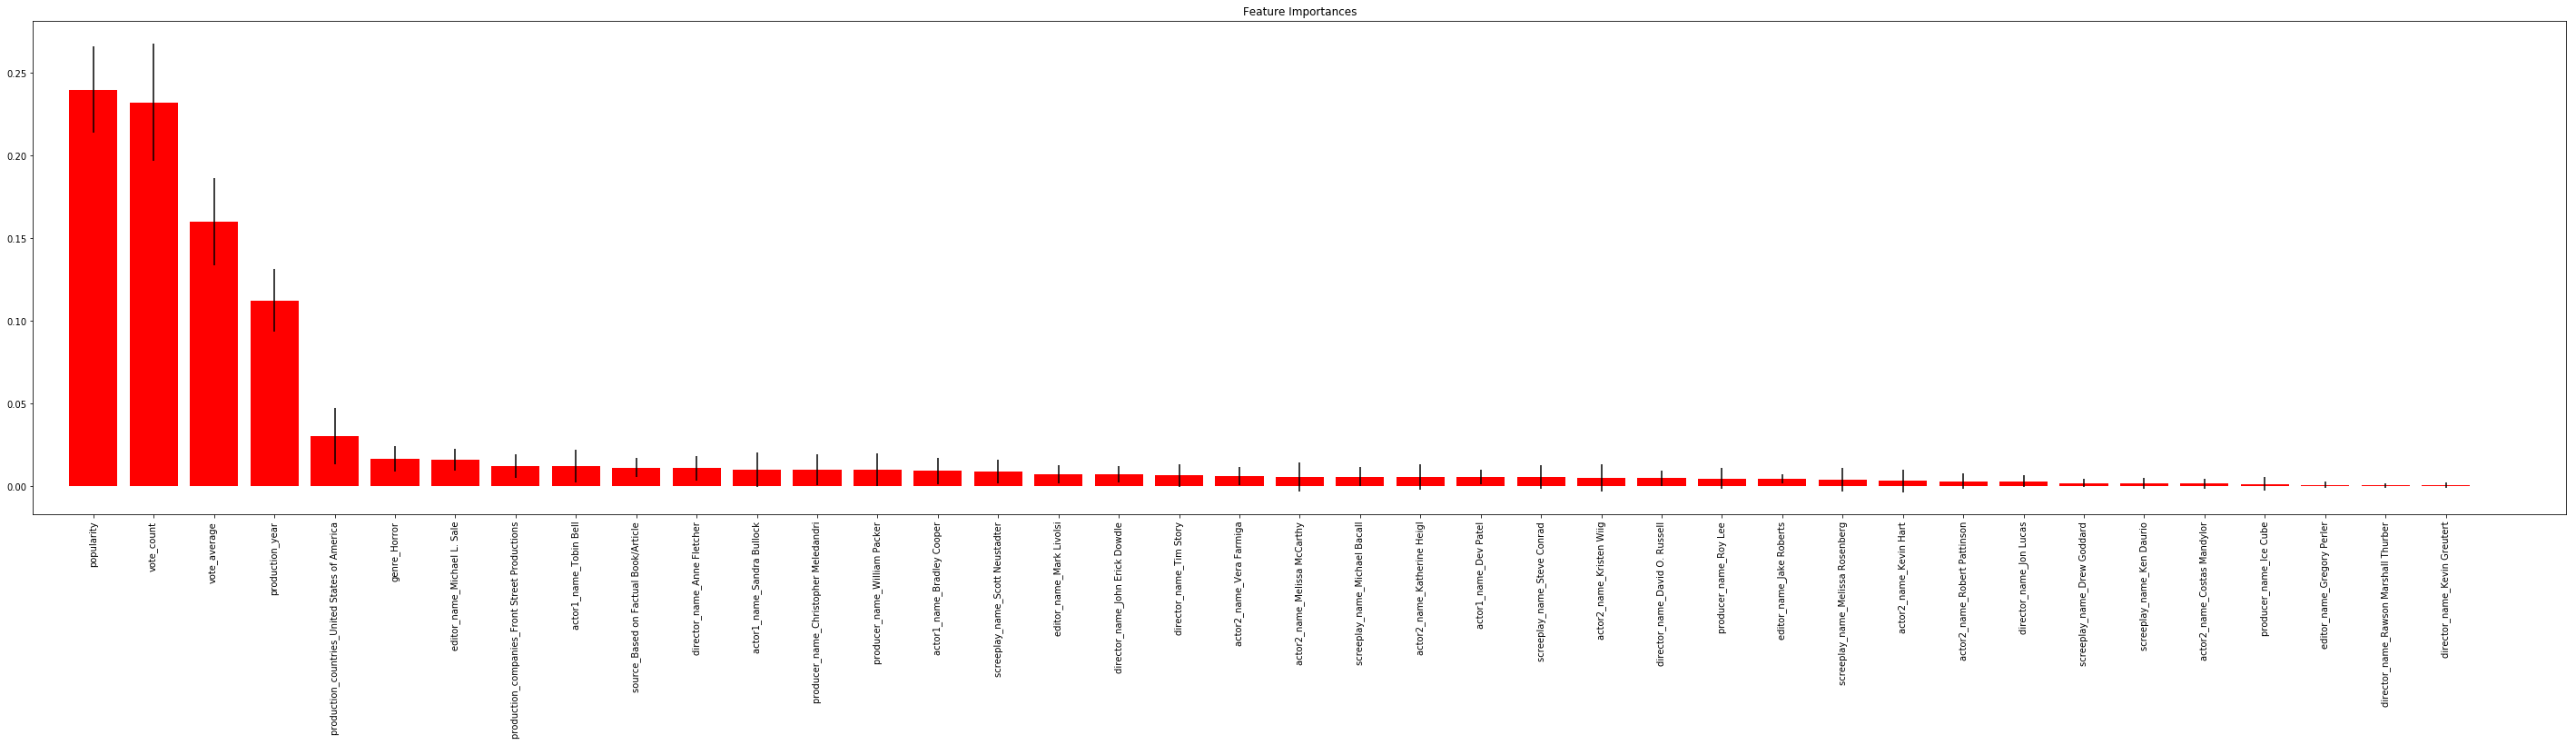

In [57]:
# Plot the feature importances of the random forest. top 200 features
plt.figure(figsize=(50,10))
plt.title("Feature Importances")
plt.bar(range(40), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(40), X.columns[indices], rotation='vertical')
plt.xlim([-1, 41])
plt.show()

In [58]:
# # graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

# def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
#     if autoscale:
#         x_scale = model.feature_importances_.max()+headroom
#     else:
#         x_scale = 1
    
#     feature_dict=dict(zip(feature_names, model.feature_importances_))
    
#     if summarized_columns:
#         for col_name in summarized_columns:
#             sum_value= sum(x for i, x in feature_dict.iteritems() if col_name in i)
            
#             key_to_remove = [i for i in feature_dict_keys() if col_name in i]
#             for i in keys_to_remove:
#                 feature_dict.pop(i)
#             feature_dict[col_name] = sum_value
#     results = pd.Series(feature_dict.values(), index=feature_dict.keys())
#     results.sort(axis=1)
#     results.pliot(kind="barh", figsize=(width, len(results)/4), xlim=(0,x_scale))
    
# graph_feature_importances(model, X.columns, summarized_columns=movie_final.columns)

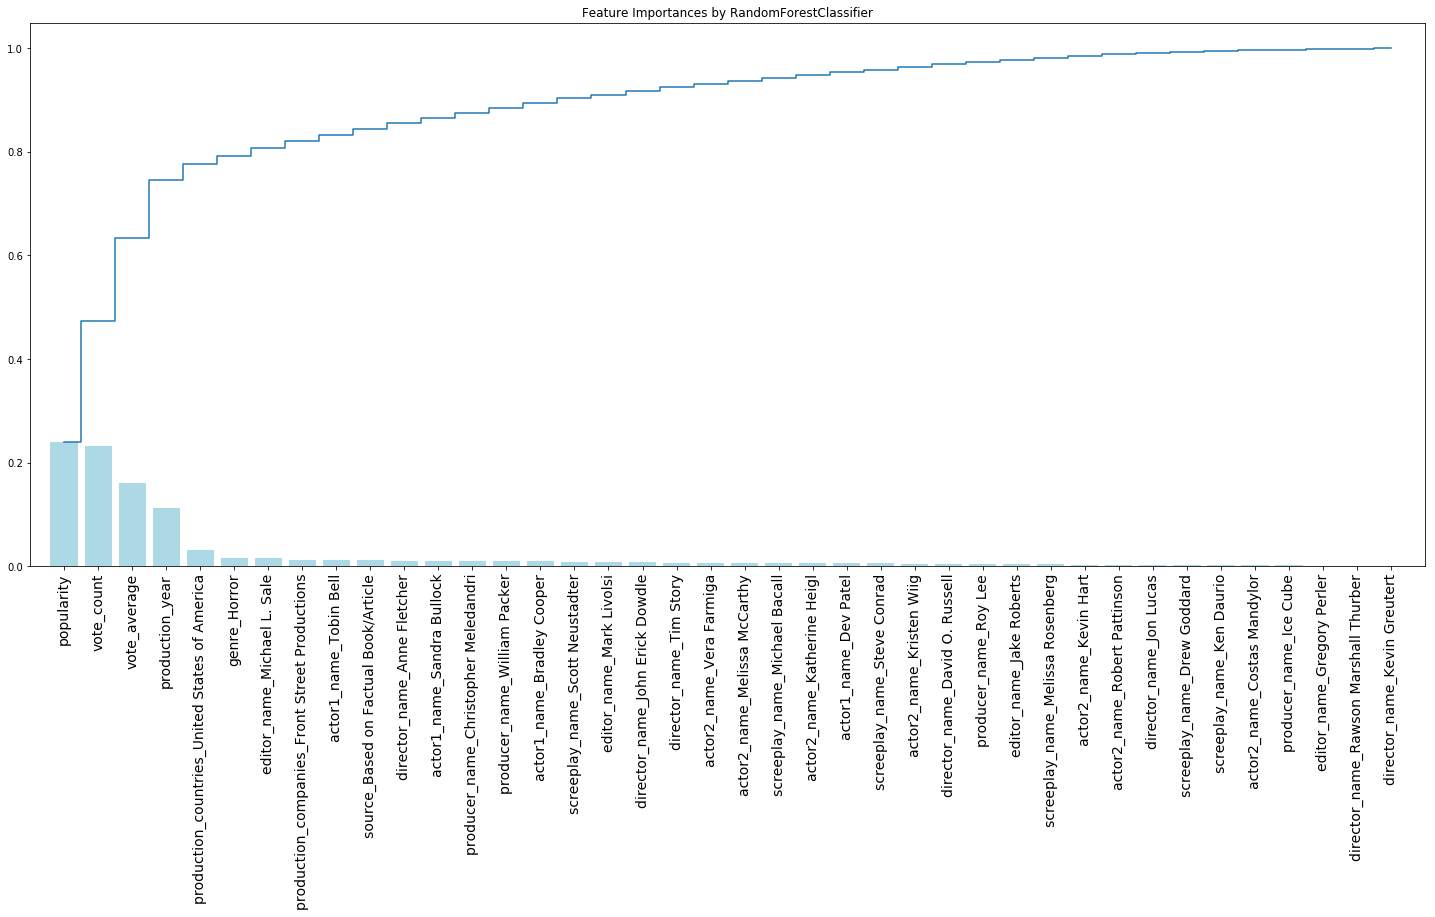

In [59]:
plt.figure(figsize=(25,10))
plt.title("Feature Importances by RandomForestClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), X.columns[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, 40])
plt.show()

## Parameter Testing

## n_jobs

In [60]:
%%timeit

model = RandomForestClassifier(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X,y)

2.06 s ± 129 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
%%timeit

model = RandomForestClassifier(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,y)

1.75 s ± 45.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## n_estimaters

20 trees
Random Forest AUC = 0.58

50 trees
Random Forest AUC = 0.58

100 trees
Random Forest AUC = 0.59

200 trees
Random Forest AUC = 0.58

500 trees
Random Forest AUC = 0.59

1000 trees
Random Forest AUC = 0.58

2000 trees
Random Forest AUC = 0.59



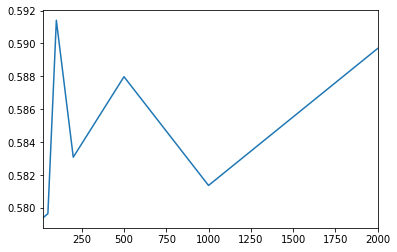

In [63]:
#setting gird of parameters and testing for best results
results = []
n_estimators_options = [20, 50, 100, 200, 500, 1000, 2000]

for option in n_estimators_options:
    model = RandomForestClassifier(
    n_estimators=option,
    max_depth=None,
    min_samples_split=5,
    class_weight="balanced",
    random_state=42
    )
    model.fit(X_train,y_train)
    print (option,"trees")
    roc = roc_auc_score(y_test, model.predict(X_test))
    print ("Random Forest AUC = %2.2f" % roc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimators_options).plot();

auto max_features
C-Stat: 0.591408934708

sqrt max_features
C-Stat: 0.591408934708

log2 max_features
C-Stat: 0.574742268041

0.9 max_features
C-Stat: 0.584278350515

0.2 max_features
C-Stat: 0.579381443299



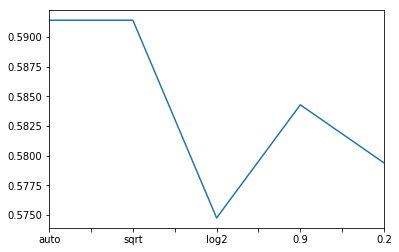

In [67]:
results = []
max_features_options = ["auto", "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=5,
    class_weight="balanced",
    max_features=max_features,
    random_state=42
    )
    rf.fit(X_train,y_train)
    print (max_features,"max_features")
    roc = roc_auc_score(y_test, rf.predict(X_test))
    print ("C-Stat:",roc)
    results.append(roc)
    print ("")
    
pd.Series(results, max_features_options).plot();

5 splits
C-Stat: 0.591408934708

10 splits
C-Stat: 0.612714776632

15 splits
C-Stat: 0.637199312715

25 splits
C-Stat: 0.630068728522

30 splits
C-Stat: 0.665120274914

40 splits
C-Stat: 0.641065292096

50 splits
C-Stat: 0.659450171821

100 splits
C-Stat: 0.656701030928



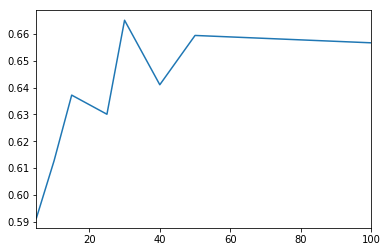

In [68]:
results = []
min_samples_splits = [5, 10, 15, 25, 30, 40, 50, 100]

for split in min_samples_splits:
    rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=split,
    class_weight="balanced",
    max_features='auto',
    random_state=42
    )
    rf.fit(X_train,y_train)
    print (split,"splits")
    roc = roc_auc_score(y_test, rf.predict(X_test))
    print ("C-Stat:",roc)
    results.append(roc)
    print ("")
    
pd.Series(results, min_samples_splits).plot();

In [69]:
print(len(x_names))
print(len(importances))
print(len(indices))

43
43
40


## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree = tree.DecisionTreeClassifier()

In [71]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,
    random_state=42
  )

dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))



 ---Decision Tree Model---
Decision Tree AUC = 0.63
             precision    recall  f1-score   support

          0       0.88      0.76      0.82       291
          1       0.30      0.50      0.38        60

avg / total       0.78      0.72      0.74       351



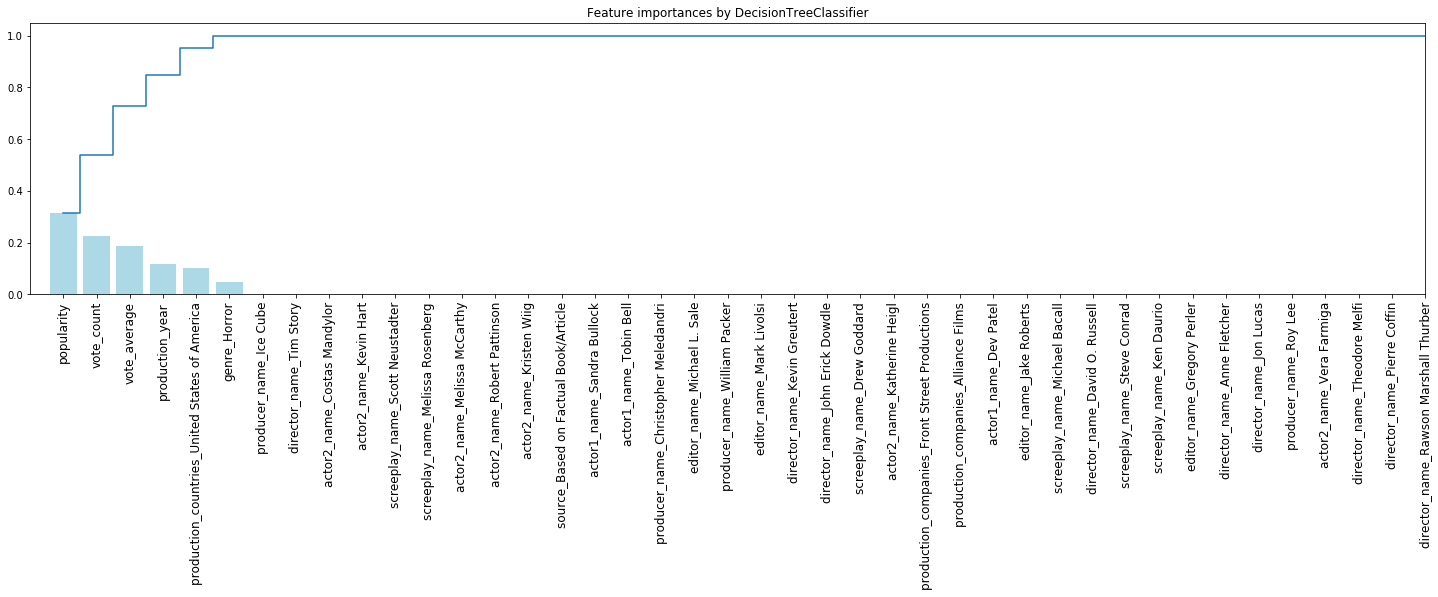

In [73]:
importances = dtree.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(25,5))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), X.columns[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, 41])
plt.show()

## Roc Curve

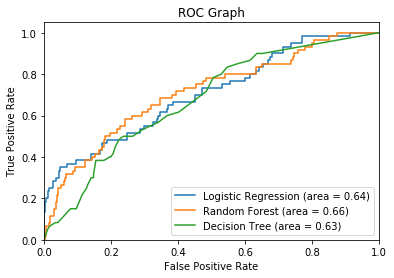

In [74]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logic_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()